In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list) 

In [14]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
df_DA['job_posted_month'] = df_DA['job_posted_date'].dt.month

df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month', columns='job_skills', aggfunc='size', fill_value=0)
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot.drop('Total', inplace=True)

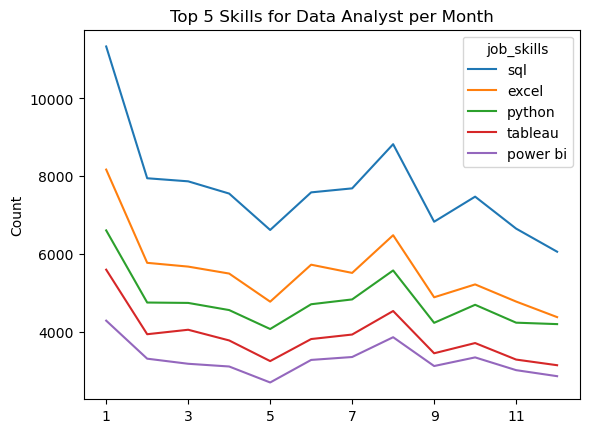

In [16]:
df_DA_pivot.iloc[:, :5].plot(kind='line')
plt.title('Top 5 Skills for Data Analyst per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()